<a href="https://colab.research.google.com/github/Ananya904/Sales-Forecasting-/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Forecasting


#Objective



*  Forecast next quarter’s (3 months) sales.
*   Use ARIMA/SARIMA model.
*  Evaluate model using MAE and MAPE.
*   Provide confidence intervals for predictions

Data Loading & Understanding

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df= pd.read_csv('monthly-sales.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [33]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [42]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [43]:
df.tail()

,Month,Sales
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


In [36]:
df.drop(106,axis=0,inplace=True)

In [44]:
df.tail()

,Month,Sales
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


In [38]:
df.drop(105,axis=0,inplace=True)

In [45]:
df.tail()

,Month,Sales
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


#Exploratory Data Analysis (EDA)

In [39]:
df['Month']=pd.to_datetime(df['Month'])

In [46]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [47]:
df.set_index('Month',inplace=True)

In [48]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Month'>

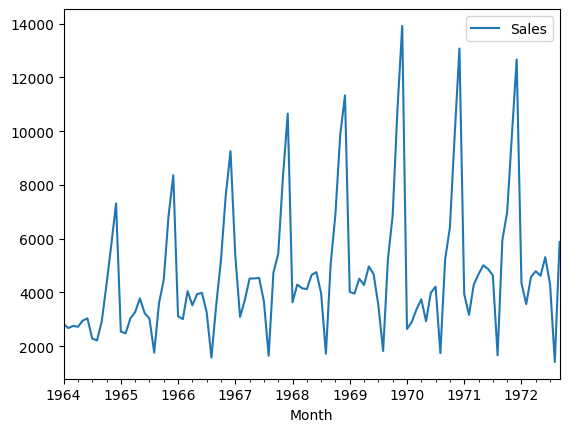

In [49]:
df.plot()

#Stationarity Check

In [52]:
from statsmodels.tsa.stattools import adfuller

In [54]:
test=adfuller(df['Sales'])

In [55]:
#H0 : It is not stationary
#H1: It is stationary
def adfuller_test(Sales):
  result=adfuller(Sales)
  labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for val,label in zip(result,labels):
    print(label+' : '+str(val))
  if result[1]<=0.05:
    print("Strong evidence against the null hypothesis(H0)")
  else:
    print("Weak evidence against null hypothesis, time series has a unit root, identification it is not stationary ")

In [56]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against null hypothesis, time series has a unit root, identification it is not stationary 


Differencing

In [57]:
df['Sales First Difference ']=df['Sales']-df['Sales'].shift(1)

In [58]:
df['Sales'].shift(1)

,Sales
Month,
1964-01-01,NaN
1964-02-01,2815.0
1964-03-01,2672.0
1964-04-01,2755.0
1964-05-01,2721.0
...,...
1972-05-01,4788.0
1972-06-01,4618.0
1972-07-01,5312.0


In [59]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [60]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [73]:
a=df['Seasonal First Difference'].dropna()
adfuller_test(a)


ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
Strong evidence against the null hypothesis(H0)


<Axes: xlabel='Month'>

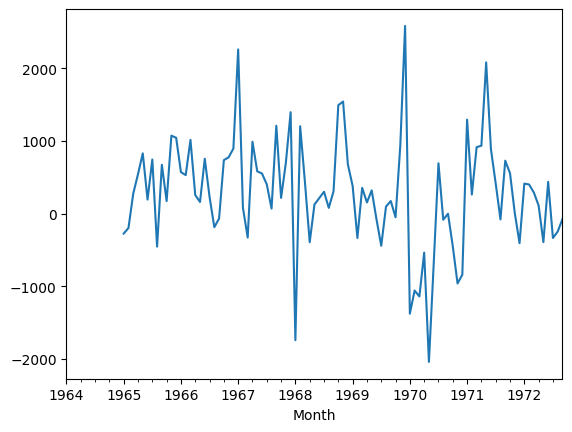

In [80]:
df['Seasonal First Difference'].plot()

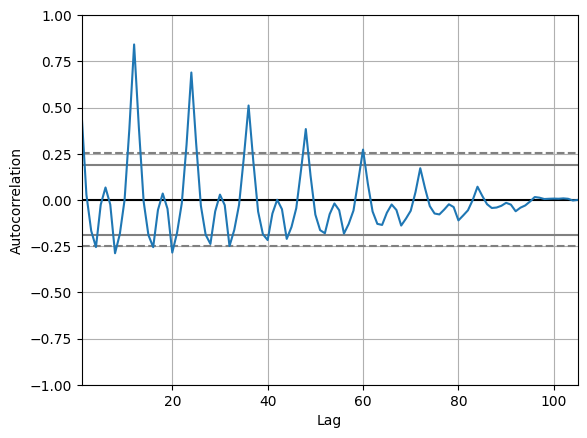

In [87]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Sales'])
plt.show()


In [93]:
import statsmodels.api as sm


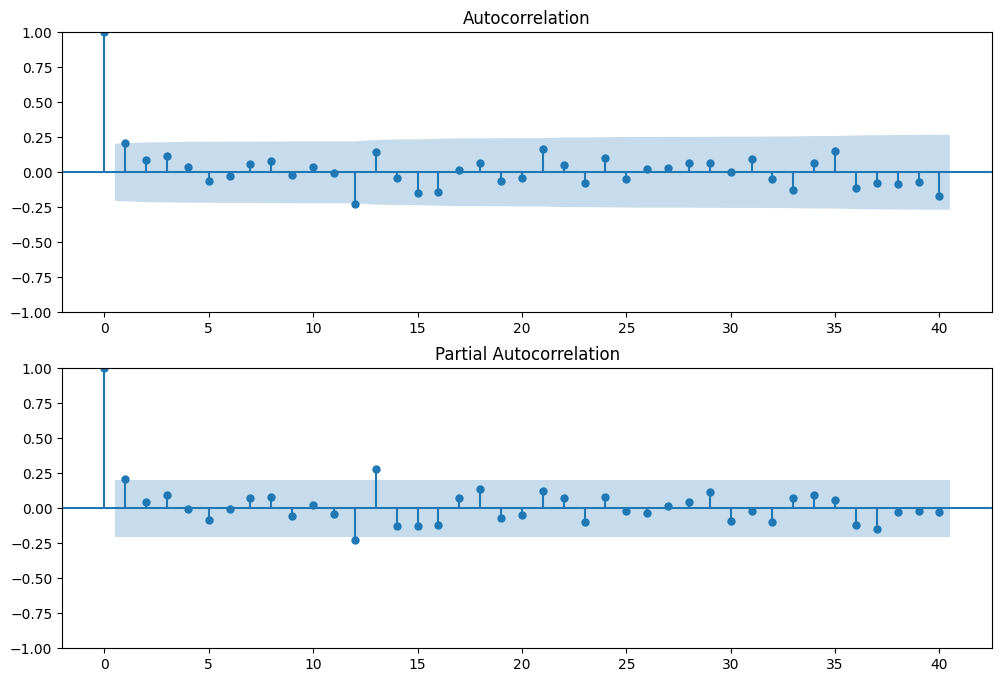

In [94]:
fig= plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2= fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [98]:
from statsmodels.tsa.arima.model import ARIMA


In [119]:
model= sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

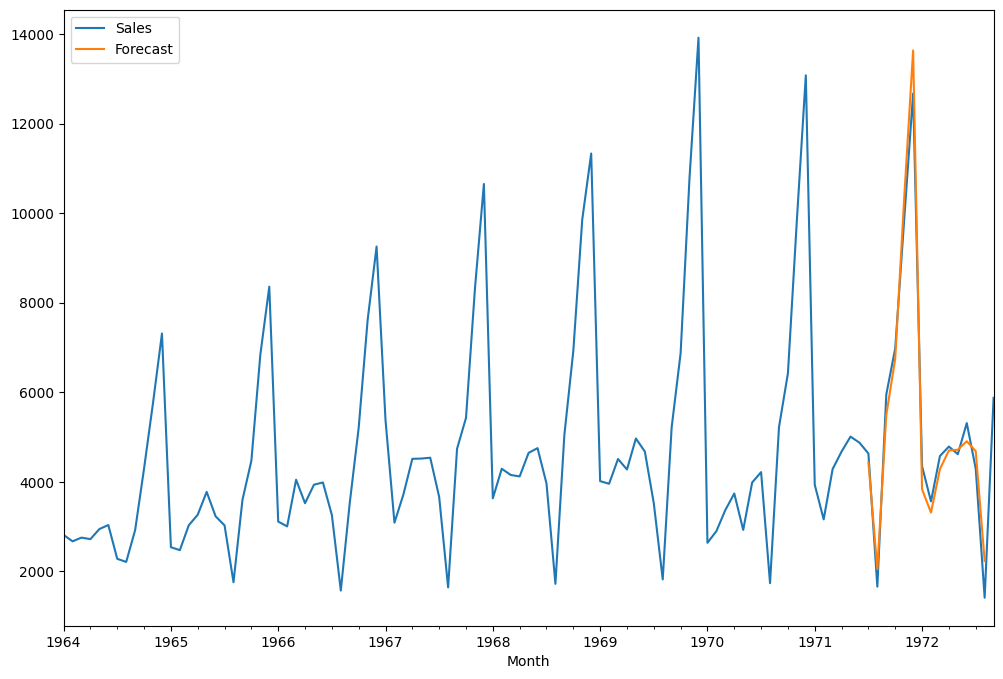

In [120]:
df['Forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))

In [121]:
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 4)]

future_dates_df = pd.DataFrame(index=future_dates, columns=df.columns)

future_dates_df.tail()


,Sales,Sales First Difference,Seasonal First Difference,forecast,Forecast
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN


In [122]:
future_df=pd.concat((df,future_dates_df))

/tmp/ipython-input-2502610817.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat((df,future_dates_df))


<Axes: >

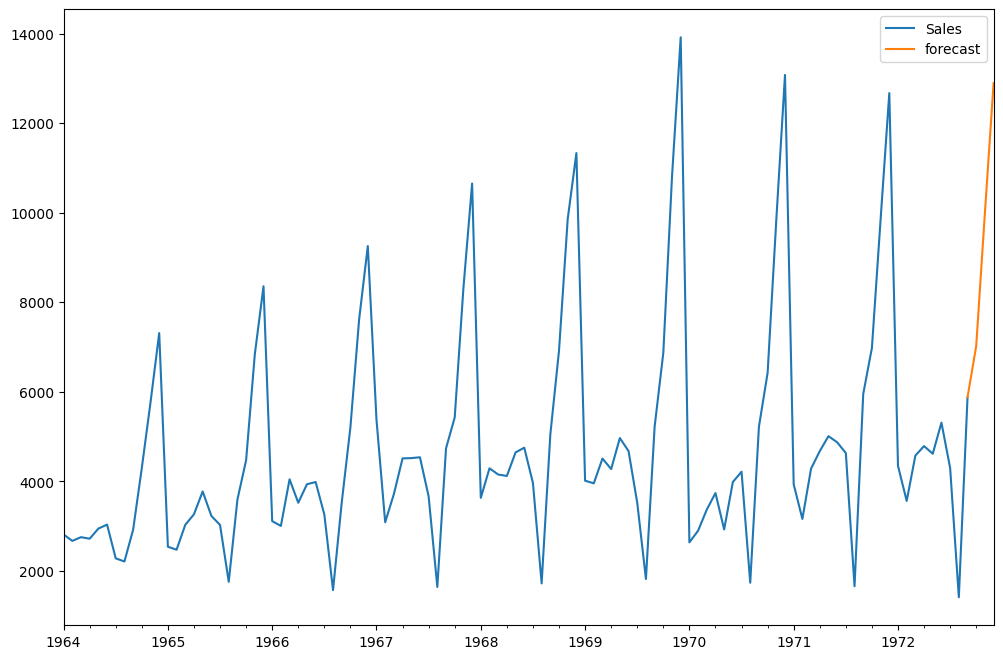

In [123]:
future_df['forecast']= results.predict(start=104, end=120,dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,8))

In [124]:
forecast = results.get_forecast(steps=3)

forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


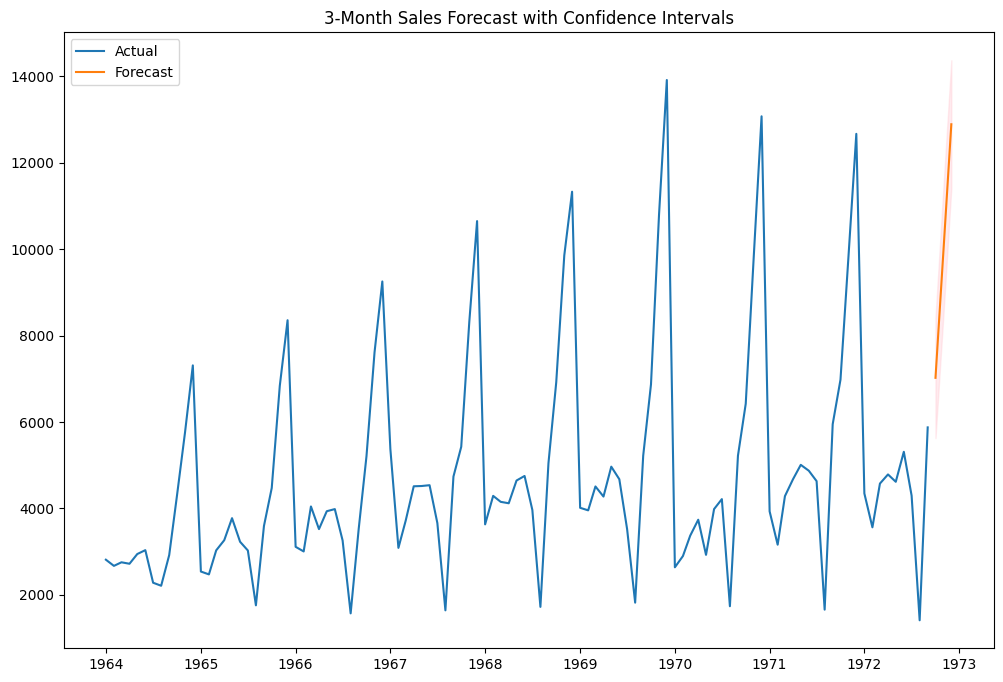

In [125]:
plt.figure(figsize=(12,8))

plt.plot(df['Sales'], label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')

plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],
                 color='pink', alpha=0.3)

plt.legend()
plt.title("3-Month Sales Forecast with Confidence Intervals")
plt.show()


MODEL EVALUATION


In [128]:
train = df.iloc[:-12]
test = df.iloc[-12:]
model = sm.tsa.statespace.SARIMAX(
    train['Sales'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

results = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [127]:
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


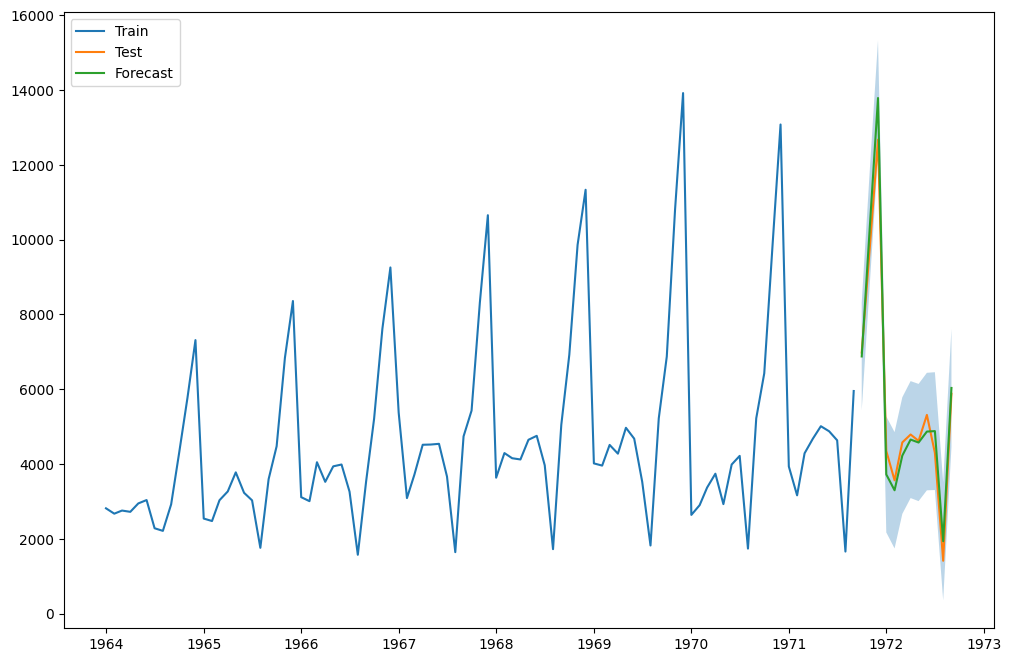

In [129]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Test')
plt.plot(test.index, forecast_mean, label='Forecast')

plt.fill_between(
    test.index,
    conf_int.iloc[:,0],
    conf_int.iloc[:,1],
    alpha=0.3
)

plt.legend()
plt.show()


Accuracy Metrics

In [130]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(test['Sales'], forecast_mean)

mape = np.mean(np.abs((test['Sales'] - forecast_mean) / test['Sales'])) * 100

print("MAE:", mae)
print("MAPE:", mape)


MAE: 410.00128214807637
MAPE: 9.248997274306618


 3 Month Forecast

In [131]:
final_model = sm.tsa.statespace.SARIMAX(
    df['Sales'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

final_results = final_model.fit()

future_forecast = final_results.get_forecast(steps=3)
future_mean = future_forecast.predicted_mean
future_conf = future_forecast.conf_int()

print(future_mean)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1972-10-01     7023.698877
1972-11-01     9996.175791
1972-12-01    12891.998127
Freq: MS, Name: predicted_mean, dtype: float64


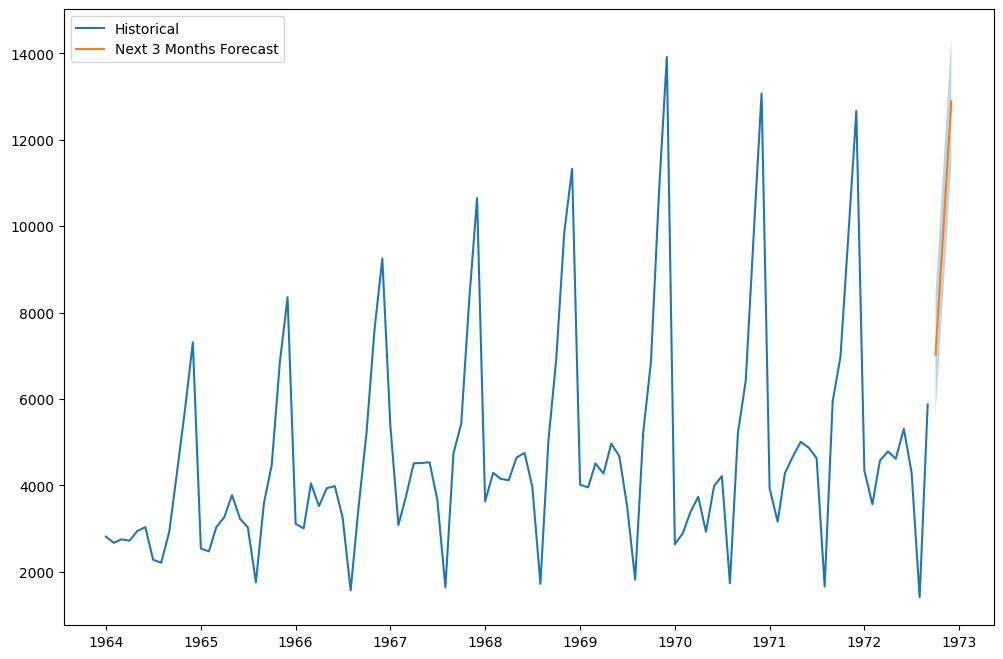

In [132]:
plt.figure(figsize=(12,8))

plt.plot(df.index, df['Sales'], label='Historical')
plt.plot(future_mean.index, future_mean, label='Next 3 Months Forecast')

plt.fill_between(
    future_mean.index,
    future_conf.iloc[:,0],
    future_conf.iloc[:,1],
    alpha=0.3
)

plt.legend()
plt.show()


# Sales Forecasting Project Summary

## Objective
The objective of this project was to forecast next quarter’s monthly sales using time series analysis and ARIMA modeling techniques.

## Data Understanding
The dataset contained monthly sales data. Initial visualization showed an upward trend and clear 12-month seasonality.

## Stationarity Check
The Augmented Dickey-Fuller (ADF) test indicated the series was non-stationary. After applying seasonal differencing (lag = 12), the series became stationary.

## Model Used
A SARIMA (1,1,1)(1,1,1,12) model was fitted to capture both trend and seasonal components.

## Model Evaluation
The model performance was evaluated using:
- Mean Absolute Error (MAE): 410.00128214807637
- Mean Absolute Percentage Error (MAPE): 9.248997274306618 %

The relatively low MAPE indicates acceptable forecasting accuracy.

## Forecast Result
The model predicts the next 3 months’ sales with 95% confidence intervals, which can assist in business planning and decision-making.
